## PE 1- Baseball Case Study

#### Problem Statement: Baseball Case Study

-Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

#### Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

#### Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

For downloading the dataset, use the link given below. 
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

In [652]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
pd.set_option('display.max_rows', None)                      #displays maximum rows

In [653]:
#Complete dataset is displayed with all rows and columns
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


- The Wins column ("W") is our target column. Since the data in the column is continuous we can go ahead with the Linear Regression for study.
   
**With Wikipedia's help, we can elaborate the column details:
- 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
- 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
- AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
- BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
- H – Hit: reaching base because of a batted, fair ball without error by the defense
- HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
- R – Runs scored: number of times a player crosses home plate
- SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
- K (or SO) – Strikeout: number of batters who received strike three
- RA – Run average: number of runs allowed times nine divided by innings pitched
- ER – Earned run: number of runs that did not occur as a result of errors or passed balls
- ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
- CG – Complete game: number of games where player was the only pitcher for their team
- SHO – Shutout: number of complete games pitched with no runs allowed 
- SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
- E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

#### Checking Information of the dataset

In [657]:
df.columns #name of columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

'W'=Number of predicted wins (W), 'R'=Runs, 'AB'=At Bats, 'H'=Hits, '2B'=Doubles, '3B'=Triples, 'HR'=Homeruns, 'BB'=Walks, 'SO'=Strikeouts, 'SB'=Stolen Bases, 'RA'=Runs Allowed, 'ER'=Earned Runs, 'ERA'=Earned Run Average (ERA), 'CG'=Shutouts, 'SHO'=Saves, 'SV'=Complete Games and 'E'= Errors

In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [655]:
type(df)

pandas.core.frame.DataFrame

In [656]:
df.shape #gives nos of rows and columns

(30, 17)

We can see that our dataset only has 30 rows and 17 columns

In [745]:
#Checking unique values of each columns
df.nunique()

Wins             24
Runs Scored      28
At Bat           29
Hits             29
Doubles          22
Triples          23
Home Runs        27
Base on Balls    29
Strike Outs      29
Stolen Base      27
Earned Runs      30
Complete Game     9
Shut Outs        12
Saves            20
Errors           21
dtype: int64

This gives information about each column's unique values.

In [659]:
# List of values in the target variable
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [660]:
#checking the null values
df.isnull().sum().sum()

0

<AxesSubplot:>

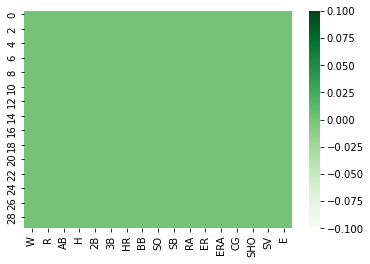

In [661]:
sns.heatmap(df.isnull(),cmap="Greens")

#### Data shows no null values as seen from the heatmap, so let's proceed ahead.

In [662]:
## Renaming the columns for better understanding while visualization process.
df.rename(columns={'W':'Wins','R':'Runs Scored','AB':'At Bat','H':'Hits','2B':'Doubles','3B':'Triples',
                   'HR':'Home Runs','BB':'Base on Balls','SO':'Strike Outs','SB':'Stolen Base','RA':'Runs Average', 
                  'ER':'Earned Runs','ERA':'Earned Run Average','CG':'Complete Game','SHO':'Shut Outs','SV' :'Saves', 
                   'E':'Errors'},inplace=True)
df.head(1)

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88


# Visualization of the data

### Univariate Analysis:

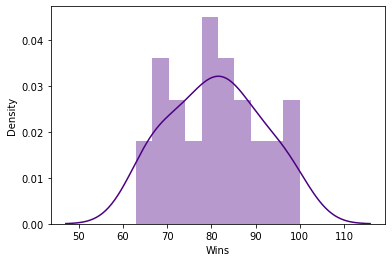

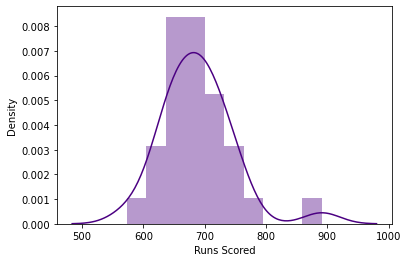

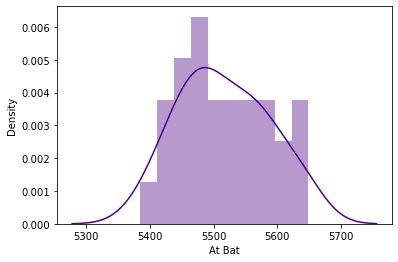

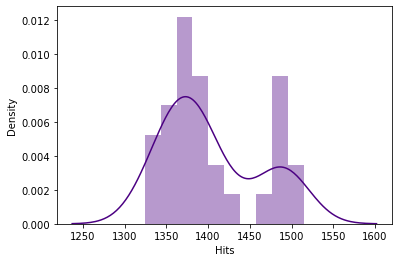

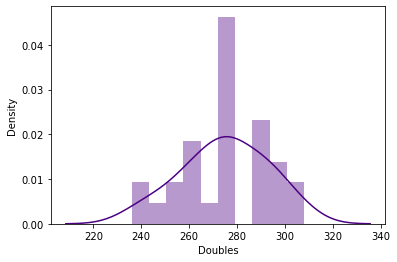

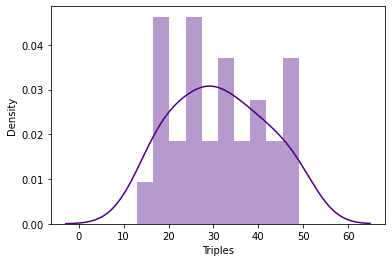

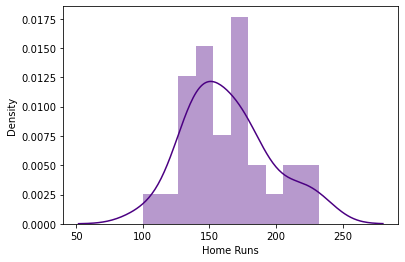

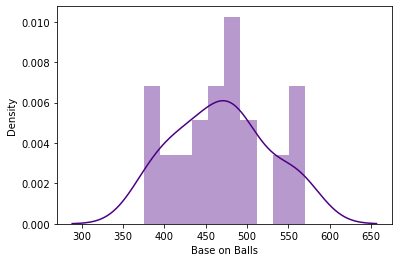

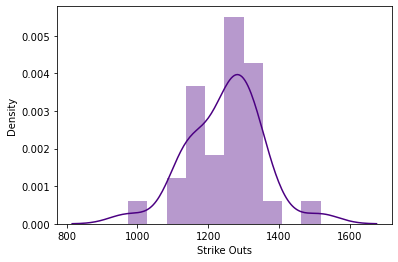

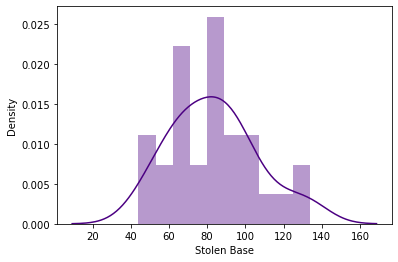

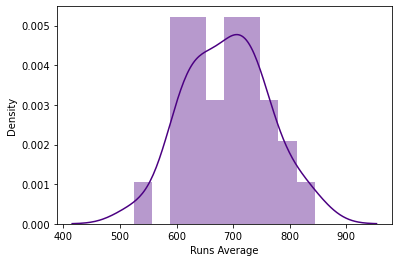

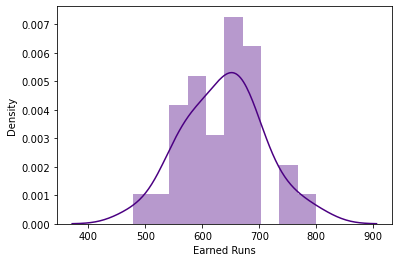

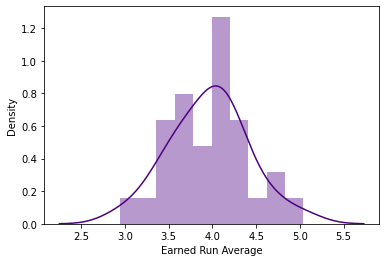

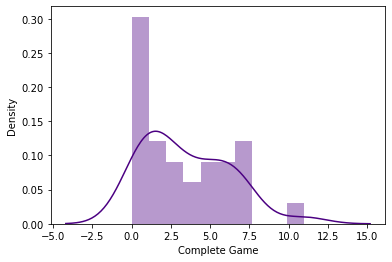

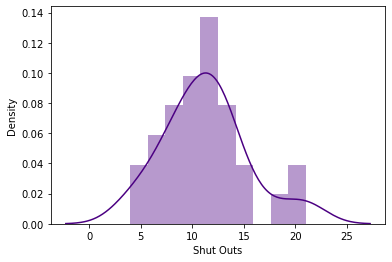

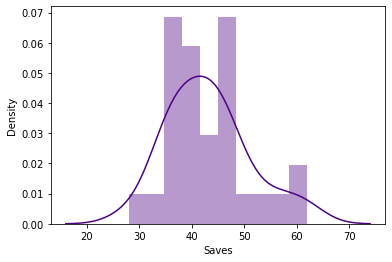

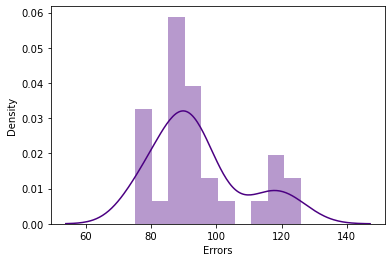

In [663]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i], color='indigo',bins=10)

- From this univariate analysis, we can see that there seems to be an almost normal distribution for most columns:
    - Wins: The graph shows normal distribution curve, and the number of wins are from 64-100.
    - Runs Scored: The graph shows a bit skewness, where the runs are in the range of 580-880, with an abnormality in the middle a bit.
    - At Bat:Shows again a normal distribution, where the range is around 5380 to 5500
    - Hits: The graphs shows a skewness.
    - Doubles: It is a bit left tail skewed graph
    - Triples:Again, a normal distribution is seen.
    - Home Runs: Normal distribution is seen with little skewness
    - Base on Balls: Shows Normal distribution too with tiny skewness.
    - Strikouts: Skewness is present and seems to be right handed.
    - Stolen Base: Normal distribution with teensy skewness.
    - Runs Average, Earned Runs, and Earned Run Average shows slight left tailed skew.
    - Complete Game, Shut Outs, Errors shows skewness to a considerable extent. 

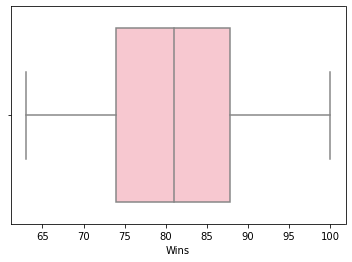

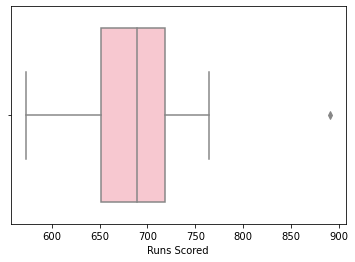

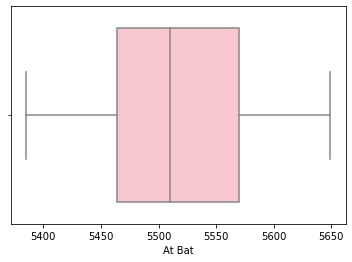

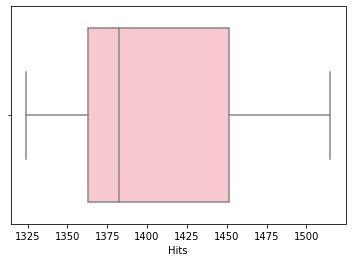

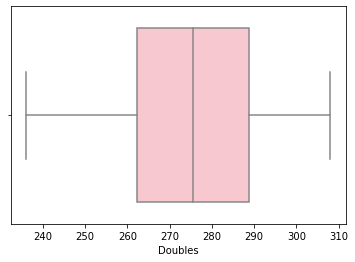

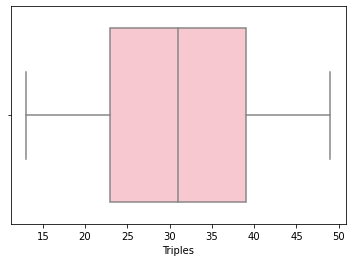

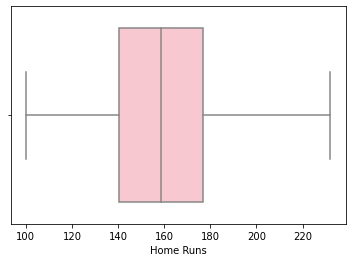

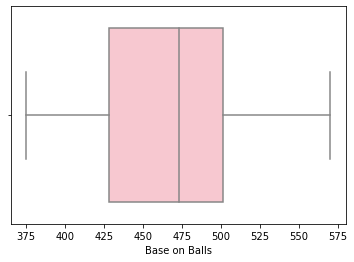

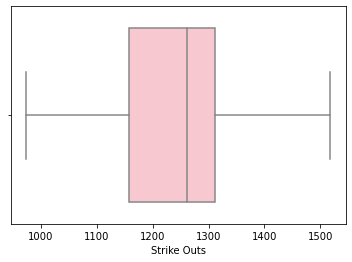

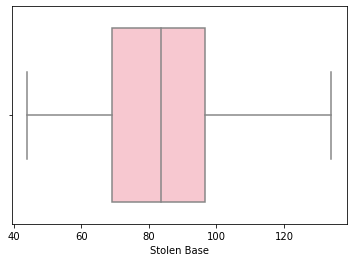

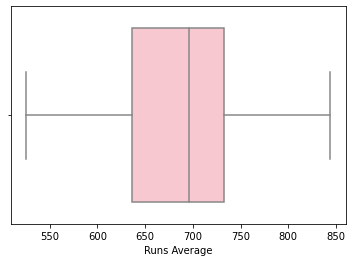

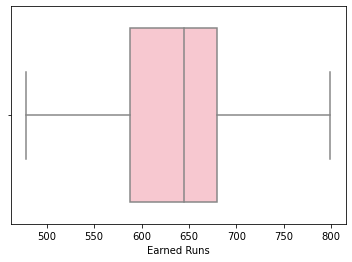

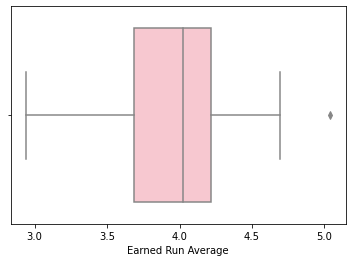

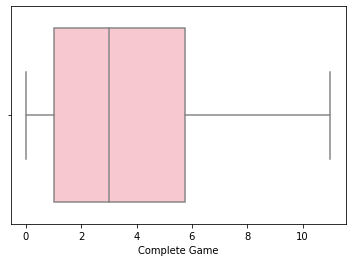

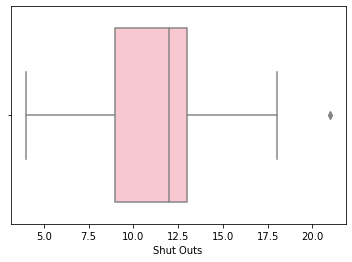

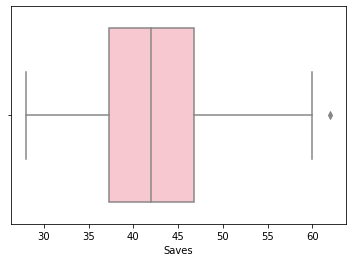

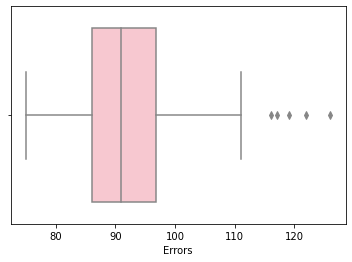

In [664]:
#Checking all columns:

for i in df.columns:
    plt.figure()
    sns.boxplot(df[i], color='pink')

From these box plots we can find out outliers too:
- Runs Scored,Earned Run Average, Shut Outs, Saves, Errors MAY have outliers. These can be dealt with in the later step. 

### Bivariate Analysis

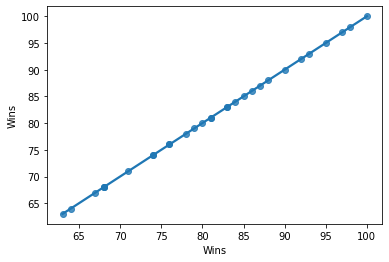

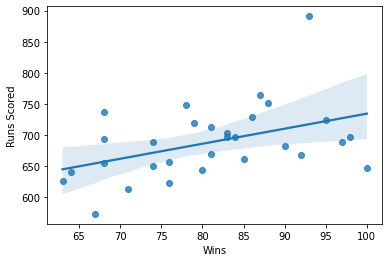

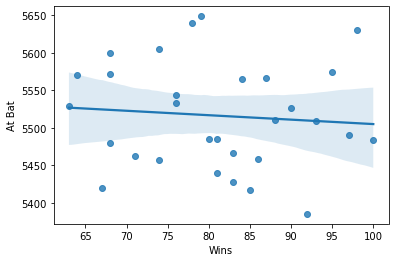

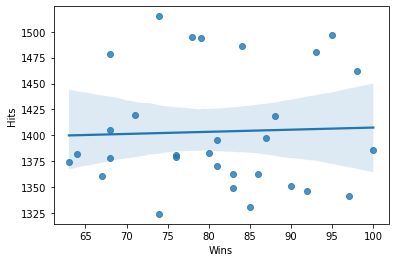

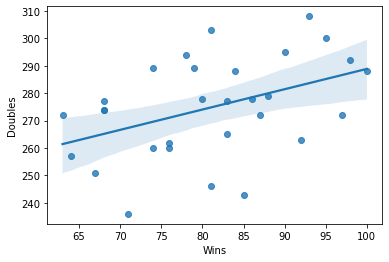

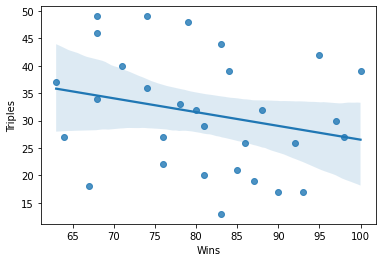

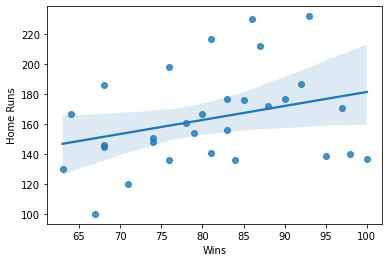

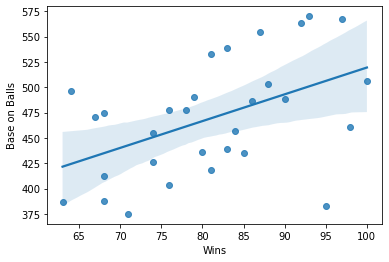

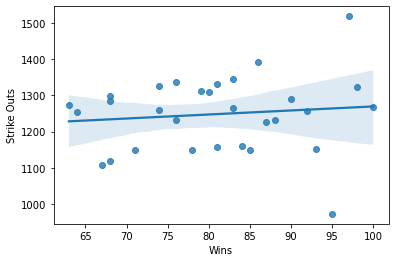

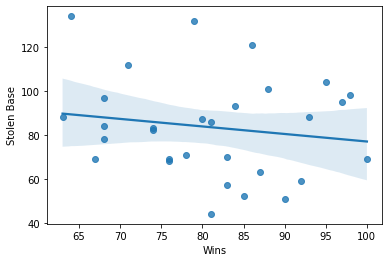

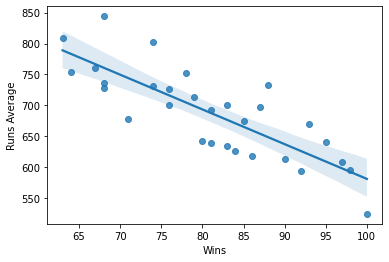

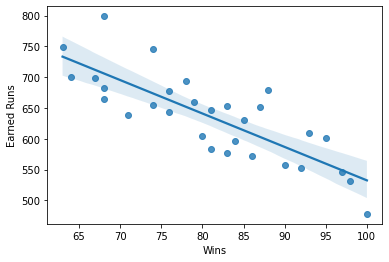

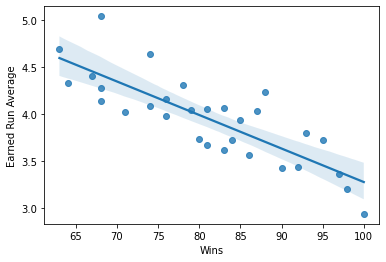

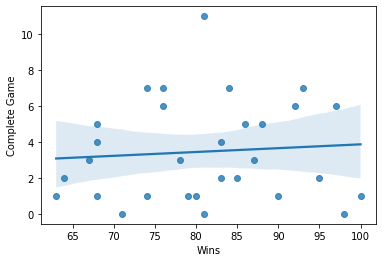

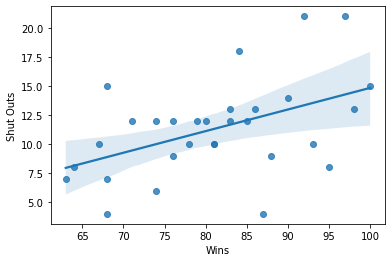

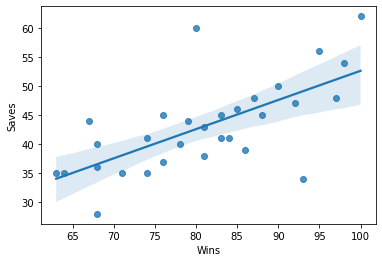

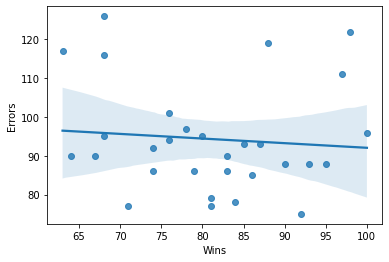

In [665]:
for i in df:
    plt.figure()
    sns.regplot(y = i , x ='Wins' , data = df)
plt.show()

- From these plots, it can be inferred that the Wins column has a positive correlation with the Run Scored, Doubles, Base on Balls,Shut outs and Saves.
- While it shows a negative relation with Earned Run Average, Earned Runs, Runs Average, Triples

### Multivariate Analysis

In [666]:
sns.pairplot?

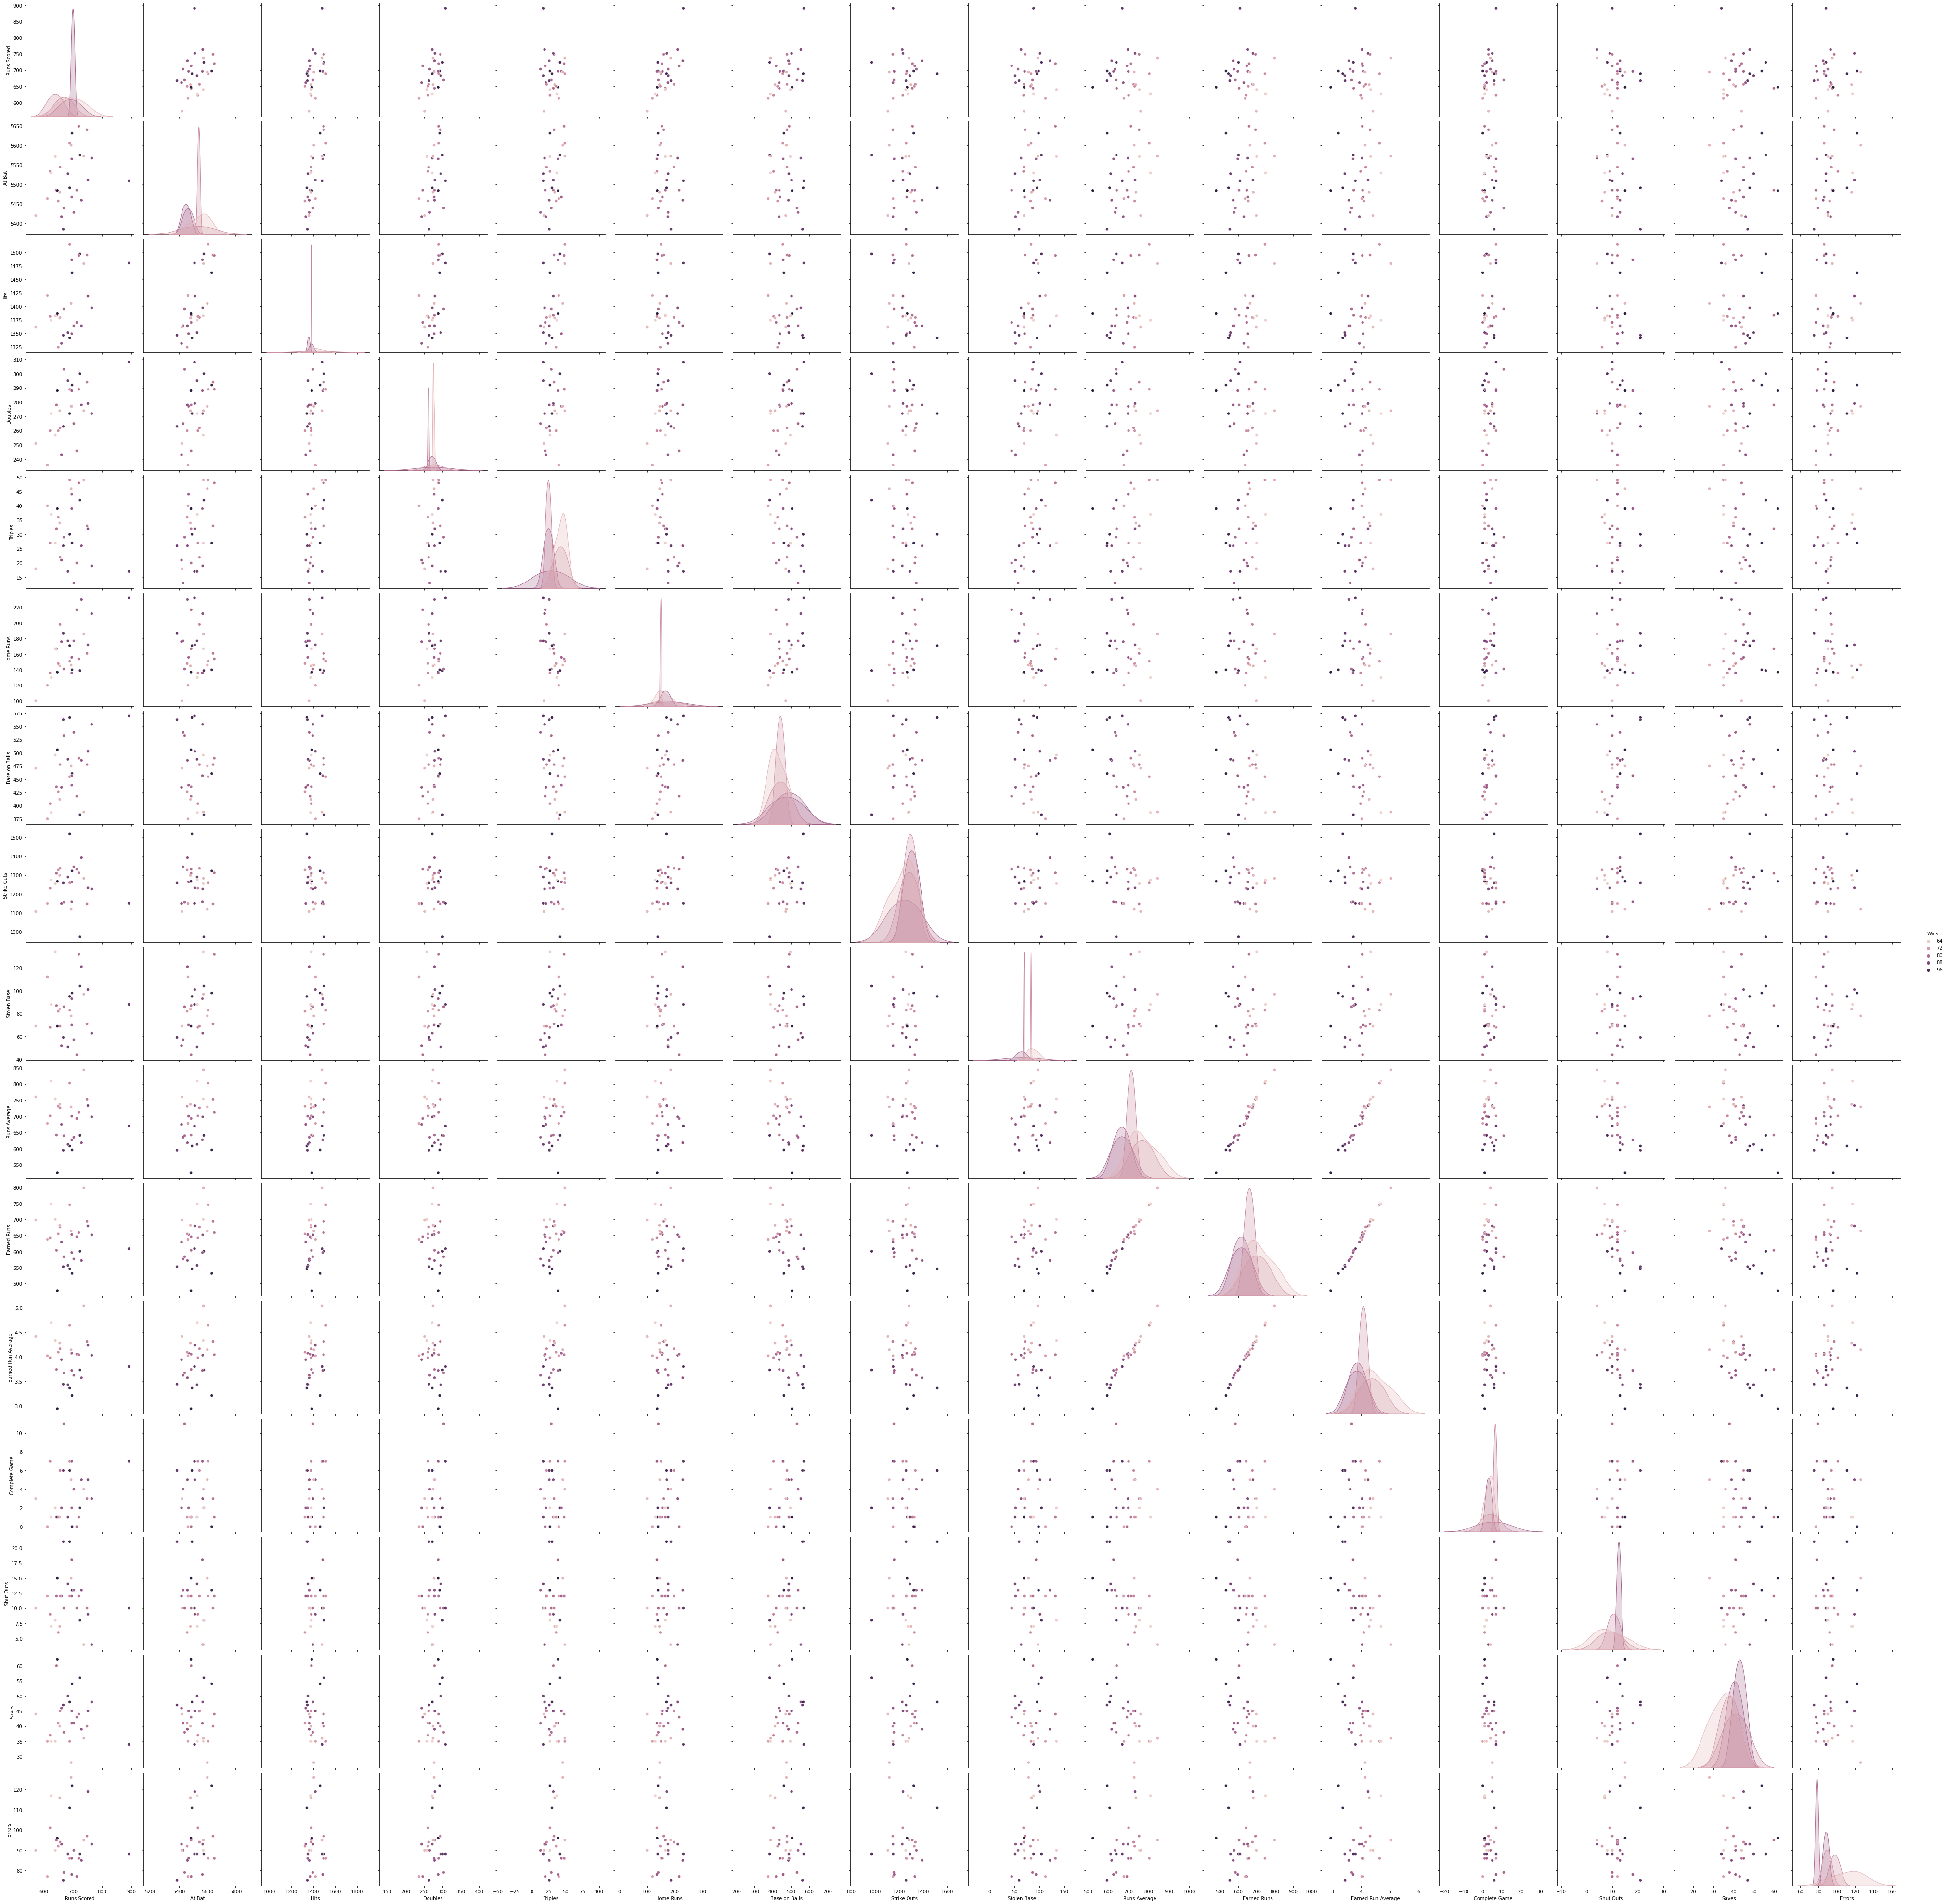

In [667]:
sns.pairplot(data=df,height=3.5,kind='scatter',hue='Wins')
plt.show()

- In the pair plot, 17 columns are plotted with the "Win" column in a scatter form, to study its correlation.
- Wins 64,72,80,88,96 are plotted in these graphs against each independent column's data.

## EXPLATORY DATA ANALYSIS(EDA)

In [668]:
df.describe()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


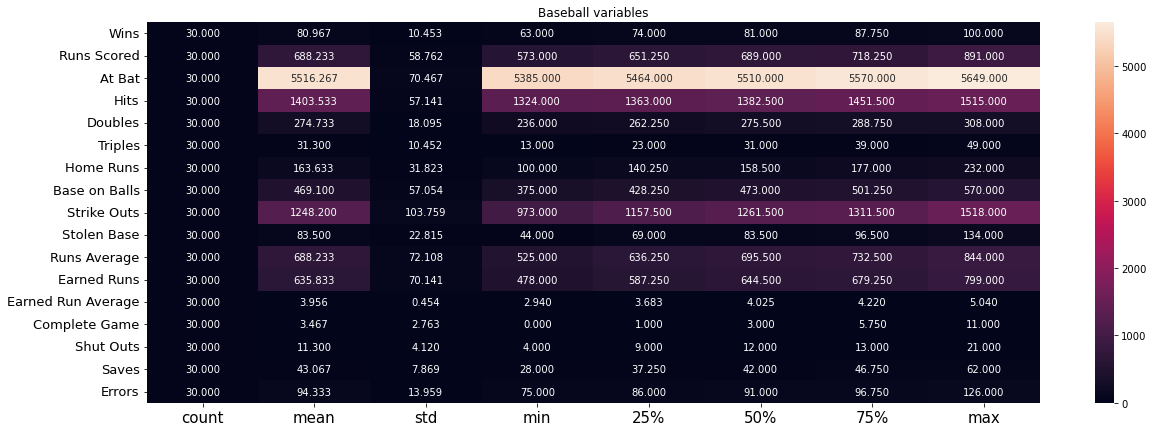

In [669]:
#plotting heat map for better understanding:
plt.figure(figsize=(20,7))
sns.heatmap(df.describe().transpose(), annot=True,fmt='0.3f')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title("Baseball variables")
plt.show()

In the above heatmap:
- The mean is > median, in 'Hits','Home Runs', 'Errors'which means that graph is positively skewed.
- The standard deviation is very high in the "Strike Outs" commpared to other columns which means that the data is highly spread.Although the data seem to be spread in mostly other columns too but less.
- The difference between the 75% percentile and max is more in the Errors, Earned runs, Runs Average,Strike Outs,Hits, At bats, Runs Scored and Doubles indicating that outliers may be present.

## Check Correlation of columns with the target:

In [747]:
df.corr() #correlation 

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Earned Runs,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.809435,0.080533,0.471805,0.666530,-0.089485
Runs Scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041245,0.232042,-0.103274,-0.096380,-0.023262
At Bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.309686,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.252489,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.235531,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.340225,-0.065898,-0.041396,-0.142370,0.126678
Home Runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.085922,0.156502,-0.019119,-0.028540,-0.207597
Base on Balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.452663,0.462478,0.426004,0.099445,-0.075685
Strike Outs,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.161612,-0.093418,0.237721,0.126297,0.155133
Stolen Base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.143068,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

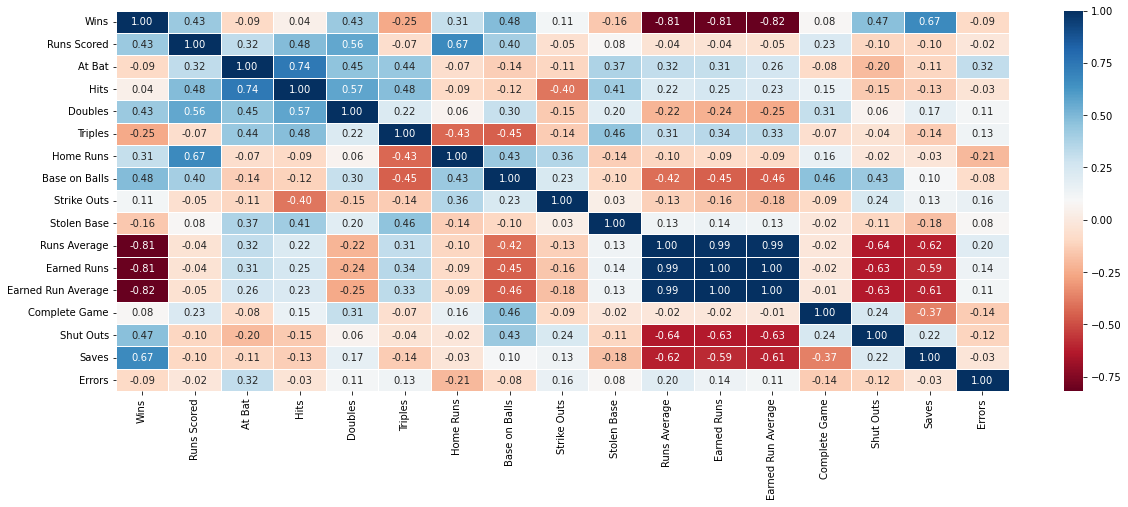

In [671]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),cmap='RdBu',annot=True,linewidth=0.5,fmt='0.2f')

In the above heatmap, information about the positive and negative correlation is given: We will see the relation betwen target (Wins) with independent variables.
- Since out target column is "Wins" we will correlate the other columns with the target column to know the relationship as positive or negative.
- The most negative relations is seen with the Average runs, Earned Runs, and Earned Runs Average.
- At Bat,Errors,Stolen Base and Triples columns show a negative relationship but to a lesser extent.
- Most positive correlations is seen with Saves, Base on Balls and Runs Scored, Doubles, Home runs, Shut outs.
- With rest of the variables : strike outs, complete game, Hits it shows a neutral relationship.

In [672]:
df.corr()['Wins'].sort_values(ascending=False)

Wins                  1.000000
Saves                 0.666530
Base on Balls         0.484342
Shut Outs             0.471805
Runs Scored           0.430751
Doubles               0.427797
Home Runs             0.307407
Strike Outs           0.111850
Complete Game         0.080533
Hits                  0.037612
At Bat               -0.087947
Errors               -0.089485
Stolen Base          -0.157234
Triples              -0.251118
Earned Runs          -0.809435
Runs Average         -0.812952
Earned Run Average   -0.819600
Name: Wins, dtype: float64

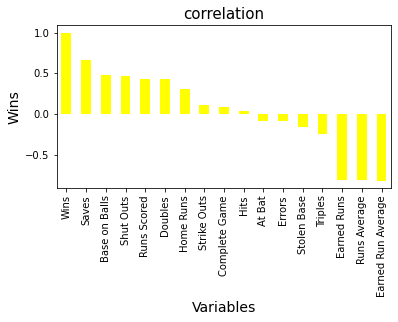

In [673]:
#checking the columns which are positively and negatively corelated with the target column:

plt.figure(figsize=(6,3))
df.corr()["Wins"].sort_values(ascending=False).plot(kind='bar', color='yellow')
plt.xlabel('Variables',fontsize=14)
plt.ylabel("Wins",fontsize=14)
plt.title("correlation",fontsize=15)
plt.show()

Most negative relationship with the target can be seen in the following columns:

    - Triples              -0.251118
    - Earned Runs          -0.809435
    - Runs Average         -0.812952
    - Earned Run Average   -0.819600
Hence we can drop the most negative columns. Also, we can see that the last 3 columns asmentioned above have similar values, which might be the reason for mulicolinearity in the data. But we can check that out later.

In [674]:
df.drop(["Earned Run Average", "Runs Average"],axis=1,inplace=True)
df.head(2)

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Earned Runs,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,601,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,653,2,12,45,86


## Checking Outliers:

Wins                AxesSubplot(0.125,0.657941;0.133621x0.222059)
Runs Scored      AxesSubplot(0.285345,0.657941;0.133621x0.222059)
At Bat            AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Hits             AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Doubles          AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Triples             AxesSubplot(0.125,0.391471;0.133621x0.222059)
Home Runs        AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Base on Balls     AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Strike Outs      AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Stolen Base      AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Earned Runs            AxesSubplot(0.125,0.125;0.133621x0.222059)
Complete Game       AxesSubplot(0.285345,0.125;0.133621x0.222059)
Shut Outs            AxesSubplot(0.44569,0.125;0.133621x0.222059)
Saves               AxesSubplot(0.606034,0.125;0.133621x0.222059)
Errors              AxesSubplot(0.766379,0.125;0.133621x0.222059)
dtype: obj

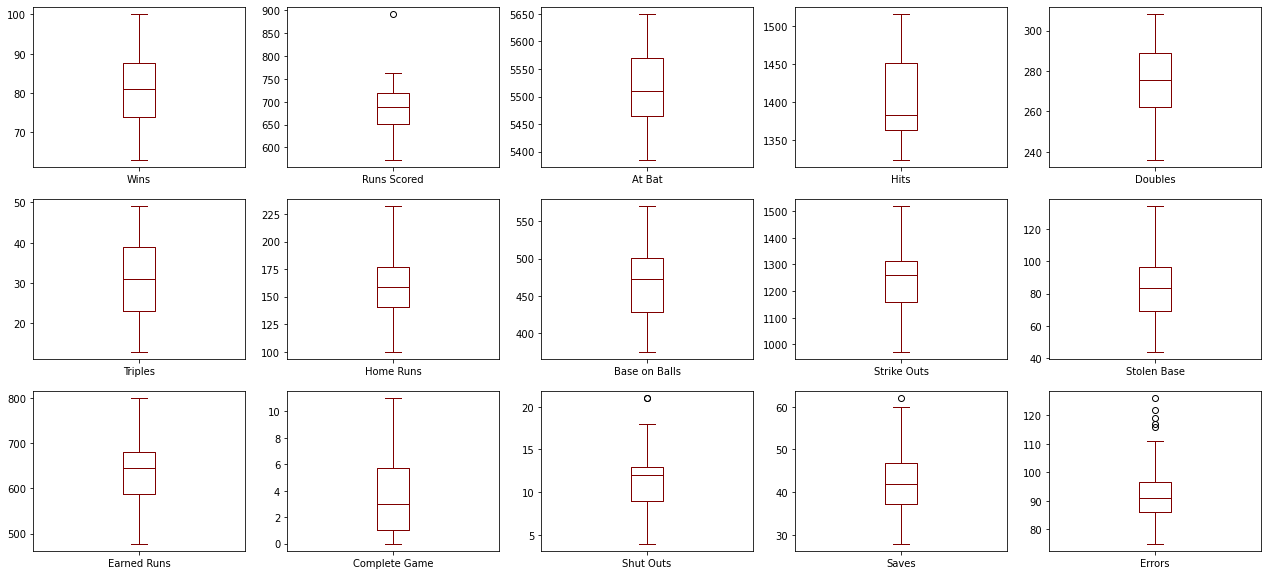

In [675]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(22,10), color='maroon')

Soe outliers MAY BE present in Runs Scored, Shut Outs,Saves, and Errors column. But we can check those using the Z score method.

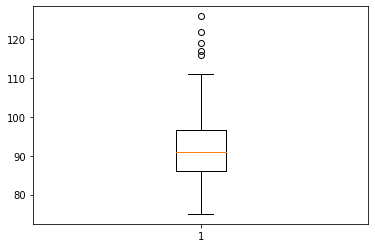

In [676]:
plt.boxplot(df['Errors'])
plt.show()

### Removing Outliers

In [677]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Earned Runs,Complete Game,Shut Outs,Saves,Errors
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.505110,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.248930,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.751623,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.103922,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.597501,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.389104,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.234429,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.147424,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.461608,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.843461,0.171757,0.320914,0.396360,0.194303


In [678]:
#threshold for zscore values-----> above 3 are considered as outliers.

threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


Seems like we have an outlier in the columns "Runs Scored" in 5th Row.

In [679]:
z.iloc[5,1]

3.5096470447193067

In [680]:
DF=df[(z<3).all(axis=1)]
DF.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Earned Runs,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,601,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,653,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,584,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,643,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,746,7,12,35,86


In [681]:
print('Old_DF:',df.shape)
print('New_DF:',DF.shape)
print('total dropped rows:',df.shape[0]-DF.shape[0])

Old_DF: (30, 15)
New_DF: (29, 15)
total dropped rows: 1


### Percentage data loss
Checking how many outliers are still there and if they help in the testing model or not.

In [682]:
loss_percent=(30-29)/30*100
print(loss_percent,'%')

3.3333333333333335 %


## Check Skewness
Threshold=+/-0.5

In [683]:
x=df.drop('Wins',axis=1)
y=df['Wins']

In [684]:
df.skew().sort_values(ascending=False)

Runs Scored      1.200786
Errors           0.890132
Complete Game    0.736845
Hits             0.670254
Saves            0.657524
Shut Outs        0.565790
Home Runs        0.516441
Stolen Base      0.479893
At Bat           0.183437
Base on Balls    0.158498
Triples          0.129502
Earned Runs      0.058710
Wins             0.047089
Strike Outs     -0.156065
Doubles         -0.230650
dtype: float64

Skewness is seen in:
- Runs Scored           1.200786
- Errors                0.890132
- Complete Game         0.736845
- Hits                  0.670254
- Saves                 0.657524
- Shut Outs             0.565790

In [685]:
from sklearn.preprocessing import power_transform
x1=power_transform(x,method='yeo-johnson')
x1

array([[ 7.28217745e-01,  8.58727497e-01,  4.99600361e-16,
         1.47768528e+00,  1.03310301e+00, -7.64625858e-01,
        -1.61091476e+00, -2.56989562e+00,  9.39708194e-01,
        -4.97424688e-01, -3.59843640e-01, -7.89579375e-01,
         1.54637800e+00, -3.34952500e-01],
       [ 2.61212021e-01, -7.01451399e-01, -3.05311332e-16,
         8.42687764e-02,  1.20332020e+00, -1.58581414e-01,
        -5.02748833e-01,  1.34912944e-01, -5.39693084e-01,
         2.57973512e-01, -3.59843640e-01,  2.51775365e-01,
         3.60443861e-01, -5.32211279e-01],
       [-2.44821020e-01, -1.12609686e+00,  0.00000000e+00,
         1.67078208e+00, -1.60269866e-01, -6.89676290e-01,
         1.12829370e+00, -9.01253791e-01,  2.11955500e-01,
        -7.46906388e-01,  1.99351257e+00, -2.45393455e-01,
        -6.07593604e-01, -1.34233137e+00],
       [-1.28512888e+00,  2.67369367e-01, -8.32667268e-17,
        -8.48599687e-01, -3.60520643e-01, -8.79048600e-01,
        -1.18120722e+00, -1.89628201e-01, -6.

In [686]:
pd.DataFrame(x1).skew()

0    -0.055006
1     0.090410
2     0.000000
3    -0.035315
4    -0.072933
5    -0.000065
6    -0.007760
7     0.041170
8    -0.010455
9    -0.001940
10   -0.059785
11    0.006560
12    0.000836
13    0.063909
dtype: float64

In [687]:
#x1 is in numpy
type(x1)

numpy.ndarray

In [688]:
x=pd.DataFrame(x1,columns=x.columns)
x.head(2)

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Earned Runs,Complete Game,Shut Outs,Saves,Errors
0,0.728218,0.858727,4.996004e-16,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.497425,-0.359844,-0.789579,1.546378,-0.334953
1,0.261212,-0.701451,-3.053113e-16,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.257974,-0.359844,0.251775,0.360444,-0.532211


In [689]:
type(x)

pandas.core.frame.DataFrame

In [690]:
x.skew()

Runs Scored     -0.055006
At Bat           0.090410
Hits             0.000000
Doubles         -0.035315
Triples         -0.072933
Home Runs       -0.000065
Base on Balls   -0.007760
Strike Outs      0.041170
Stolen Base     -0.010455
Earned Runs     -0.001940
Complete Game   -0.059785
Shut Outs        0.006560
Saves            0.000836
Errors           0.063909
dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

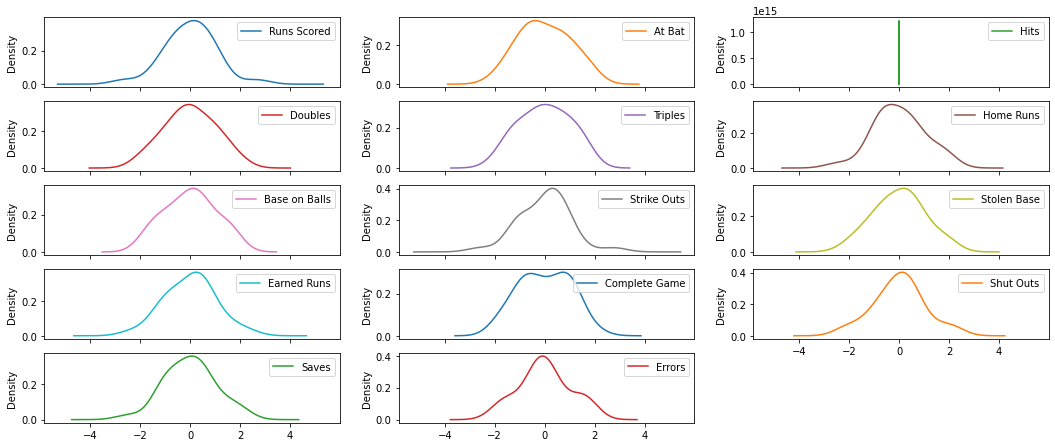

In [691]:
pd.DataFrame(x).plot(kind='kde',subplots=True,layout=(6,3),figsize=(18,9))

#### Skewness is removed, as seen from the above graphs

## Removing Multicolinearity by  Variance Inflation Factor

In [692]:
x.shape,y.shape, x.shape[1]

((30, 14), (30,), 14)

In [693]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [694]:
vif_calc()

    VIF Factor       features
0     6.250135    Runs Scored
1     2.324181         At Bat
2     6.631565           Hits
3     3.317861        Doubles
4     2.922904        Triples
5     5.940467      Home Runs
6     2.927997  Base on Balls
7     2.116299    Strike Outs
8     1.637382    Stolen Base
9     4.232741    Earned Runs
10    2.211205  Complete Game
11    2.801262      Shut Outs
12    1.981477          Saves
13    1.449178         Errors


- VIF>10 is of concern generally. 
- Here none of the columns have VIF above 10.

## Scaling The Data of the independent columns using Standard Scaler
##### Since the data is continous we use the linear regression method.

In [695]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)
x=X
x

array([[ 0.72821774,  0.85925175,  1.53885176,  1.47768528,  1.03310301,
        -0.76462586, -1.61091476, -2.56989562,  0.93970819, -0.49742469,
        -0.35984364, -0.78957937,  1.546378  , -0.3349525 ],
       [ 0.26121202, -0.70092715, -1.00156765,  0.08426878,  1.2033202 ,
        -0.15858141, -0.50274883,  0.13491294, -0.53969308,  0.25797351,
        -0.35984364,  0.25177537,  0.36044386, -0.53221128],
       [-0.24482102, -1.12557261, -0.03796029,  1.67078208, -0.16026987,
        -0.68967629,  1.1282937 , -0.90125379,  0.2119555 , -0.74690639,
         1.99351257, -0.24539345, -0.6075936 , -1.34233137],
       [-1.28512888,  0.26789362, -0.3007623 , -0.84859969, -0.36052064,
        -0.8790486 , -1.18120722, -0.1896282 , -0.64256433,  0.11357524,
         1.22010317, -0.51075929, -0.76445333,  0.67852361],
       [ 0.13562216,  1.26816961,  1.80165377,  0.79218291,  1.61644394,
        -0.3298501 , -0.20677062,  0.08545863,  0.07962852,  1.5826538 ,
         1.22010317,  0.25

In [696]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Wins, dtype: int64

# Training of the data

In [719]:
ln=LinearRegression()
maxAcc = 0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    ln = LinearRegression()
    ln.fit(x_train,y_train)
    pred = ln.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2 score is ",maxAcc,"at random state ",maxRS)

Maximum r2 score is  0.8410380542033442 at random state  42


In [720]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((21, 14), (9, 14), (21,), (9,))

### Linear regression

In [721]:
ln.fit(x_train,y_train)
pred_test=ln.predict(x_test)
pred_train=ln.predict(x_train)
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('R2 Score=',r2_score(y_test,pred_test)*100)

Mean absolute error: 4.063512698748771
Mean squared error: 21.406875367282982
Root mean squared error: 4.626756462931994
R2 Score= 84.10380542033442


### Lasso regression

In [722]:
l=Lasso(alpha=0.1) 
l.fit(x_train,y_train)
pred_test=l.predict(x_test)
pred_train=l.predict(x_train)
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('lasso R2 Score=',r2_score(y_test,pred_test)*100)

Mean absolute error: 3.6660372457077792
Mean squared error: 19.270207888567725
Root mean squared error: 4.389784492269265
lasso R2 Score= 85.69043968670714


### Ridge regression

In [730]:
r=Ridge(alpha=0.1) 
r.fit(x_train,y_train)
pred_test=r.predict(x_test)
pred_train=r.predict(x_train)
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('ridge R2 Score=',r2_score(y_test,pred_test)*100)

Mean absolute error: 3.9464895572451826
Mean squared error: 20.947742810064668
Root mean squared error: 4.576870416569019
ridge R2 Score= 84.44474543807078


### Elastic Net

In [726]:
en=ElasticNet(0.01) 
en.fit(x_train,y_train)
pred_test=en.predict(x_test)
pred_train=en.predict(x_train)
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('en R2 Score=',r2_score(y_test,pred_test)*100)

Mean absolute error: 3.878061248828683
Mean squared error: 20.564897269916713
Root mean squared error: 4.534853610638023
en R2 Score= 84.72903668075492


### DecisionTreeRegression

In [731]:
dt=DecisionTreeRegressor() 
dt.fit(x_train,y_train)
pred_test=dt.predict(x_test)
pred_train=dt.predict(x_train)
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('dt R2 Score=',r2_score(y_test,pred_test)*100)

Mean absolute error: 8.222222222222221
Mean squared error: 81.11111111111111
Root mean squared error: 9.006170724070865
dt R2 Score= 39.76897689768977


### Random Forest Regression

In [732]:
rf=RandomForestRegressor() 
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
pred_train=rf.predict(x_train)
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('rf R2 Score=',r2_score(y_test,pred_test)*100)

Mean absolute error: 5.540000000000003
Mean squared error: 45.13833333333337
Root mean squared error: 6.718506778543382
rf R2 Score= 66.48143564356432


### Support vector Regression

In [733]:
svr=SVR()
svr.fit(x_train,y_train)
pred_test=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('svr R2 Score=',r2_score(y_test,pred_test)*100)

Mean absolute error: 9.316793081393469
Mean squared error: 122.12795122257505
Root mean squared error: 11.05115157902447
svr R2 Score= 9.310927309969031


### KNeighbors Regression

In [734]:
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
pred_test=kn.predict(x_test)
pred_train=kn.predict(x_train)
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('kn R2 Score=',r2_score(y_test,pred_test)*100)

Mean absolute error: 5.755555555555554
Mean squared error: 46.15555555555554
Root mean squared error: 6.79378801226205
kn R2 Score= 65.72607260726075


### GradientBoostingRegression

In [735]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_test=gb.predict(x_test)
pred_train=gb.predict(x_train)
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('gb R2 Score=',r2_score(y_test,pred_test)*100)

Mean absolute error: 5.2326055388558785
Mean squared error: 39.084028057682694
Root mean squared error: 6.251722007389859
gb R2 Score= 70.97720688785938


### AdaBoostRegression

In [736]:
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
pred_test=ab.predict(x_test)
pred_train=ab.predict(x_train)
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('ab R2 Score=',r2_score(y_test,pred_test)*100)

Mean absolute error: 5.564373897707232
Mean squared error: 40.707049074773956
Root mean squared error: 6.380207604363196
ab R2 Score= 69.77199326130646


### ExtraTreesRegression

In [737]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
pred_test=et.predict(x_test)
pred_train=et.predict(x_train)
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('et R2 Score=',r2_score(y_test,pred_test)*100)

Mean absolute error: 5.075555555555558
Mean squared error: 38.71962222222225
Root mean squared error: 6.222509318773436
et R2 Score= 71.24780528052803


### Stochastic Gradient Descent Regression

In [738]:
sgd=SGDRegressor() 
sgd.fit(x_train,y_train)
pred_test=sgd.predict(x_test)
pred_train=sgd.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('dt R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 3.71842394844694
Mean squared error: 18.4182193205423
Root mean squared error: 4.291645292954941
dt R2 Score= 86.32310446494384


##### Lasso (L1) Regression R2 Score= 85.69=86%

## Cross Validation Method

In [711]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(ln,x,y,cv=5)
print("Cross validadtion score of Linear regression Model is", scr.mean())

scr=cross_val_score(l,x,y,cv=5)
print("Cross validadtion score of Lasso Regression is", scr.mean())

scr=cross_val_score(r,x,y,cv=5)
print("Cross validadtion score of Ridge Regression is", scr.mean())

scr=cross_val_score(en,x,y,cv=5)
print("Cross validadtion score of Elastic Net is", scr.mean())

scr=cross_val_score(dt,x,y,cv=5)
print("Cross validadtion score of Decision Tree is", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validadtion score of Random Forest is", scr.mean())

scr=cross_val_score(svr,x,y,cv=5)
print("Cross validadtion score of SVR is", scr.mean())

scr=cross_val_score(kn,x,y,cv=5)
print("Cross validadtion score of KNeighbors is", scr.mean())

scr=cross_val_score(gb,x,y,cv=5)
print("Cross validadtion score of Gradient Boosting is", scr.mean())

scr=cross_val_score(ab,x,y,cv=5)
print("Cross validadtion score of AdaBoost is", scr.mean())

scr=cross_val_score(et,x,y,cv=5)
print("Cross validadtion score of ExtraTrees is", scr.mean())

scr=cross_val_score(sgd,x,y,cv=5)
print("Cross validadtion score of Stochastic Gradient Descent Regression is", scr.mean())

Cross validadtion score of Linear regression Model is 0.2724665511230794
Cross validadtion score of Lasso Regression is 0.5414201315741402
Cross validadtion score of Ridge Regression is 0.39786642229256336
Cross validadtion score of Elastic Net is 0.4809318822706727
Cross validadtion score of Decision Tree is -2.4076124366392646
Cross validadtion score of Random Forest is -0.751327174433643
Cross validadtion score of SVR is -0.3840142476886409
Cross validadtion score of KNeighbors is -0.2273988880175954
Cross validadtion score of Gradient Boosting is -0.9291000900686793
Cross validadtion score of AdaBoost is -0.5853724463945007
Cross validadtion score of ExtraTrees is -0.23380709469009978
Cross validadtion score of Stochastic Gradient Descent Regression is 0.07755105890430844


#### Here, the best CV score for  Lasso Regression is 54% which is closer to the R2 score of 86%, compared to other models 
- Hence, we can say that, the Lasso(L1) Regression is the best algorithm for training this model

## Hyper parameter tuning of best model above (Lasso Regession)

In [712]:
from sklearn.model_selection import GridSearchCV

#creating parameters to pass in Grid serach for Lasso
para={'alpha':[0.01,0.1,1.0,10.26],'selection':['cyclic','random'],'tol':[100,1000],'max_iter':[2,4,6,8,10],
      'fit_intercept':['bool']}

In [713]:
GCV=GridSearchCV(Lasso(),para,cv=5)
GCV.fit(x_train,y_train) #fiting the data in the model
GCV.best_params_         #printing the best parameter found by GCV

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 10,
 'selection': 'random',
 'tol': 1000}

In [739]:
#Final Model:
FM=Lasso(alpha=1,fit_intercept='bool',max_iter=10,selection='random',tol=1000)
FM.fit(x_train,y_train)
predlasso=FM.predict(x_test)
print('R2_score:',r2_score(y_test,predlasso)*100)
print("Best R2 Score for GCV best estimator", FM, "is",r2_score(y_test,predlasso)*100)

R2_score: 77.40329033554048
Best R2 Score for GCV best estimator Lasso(alpha=1, fit_intercept='bool', max_iter=10, selection='random', tol=1000) is 77.40329033554048


## Saving the model

In [740]:
#saving the model 
import joblib
joblib.dump(FM,'Baseball.pkl')

['Baseball.pkl']

In [741]:
loadmodel = joblib.load('Baseball.pkl')

In [742]:
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

,Original,Predicted
0,79,82.654181
1,100,92.016237
2,67,62.600038
3,97,88.418258
4,80,79.249441
5,78,82.946196
6,74,74.239106
7,63,65.135892
8,85,76.390397


### Finding the best fit line

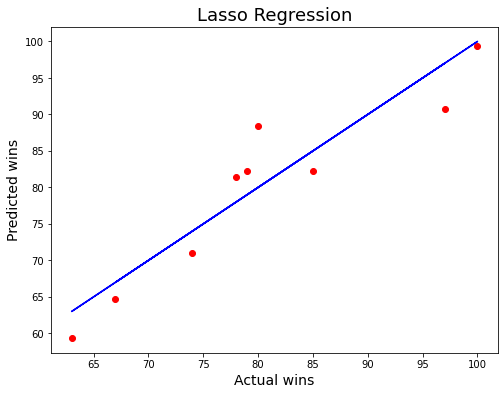

In [743]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual wins', fontsize=14)
plt.ylabel('Predicted wins', fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

#### For the case study, Lasso regression model was best fitted for the prediction of the 'Win' with the R2_score: 77, and alpha=1, fit_intercept='bool', max_iter=10, selection='random', tol=1000 as best parameters.

# END